# Stone Classifier

### Packge Load

In [1]:
import os
import cv2 as cv
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

from tensorflow.keras import models, layers, losses, optimizers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(777)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


### Prepare Dataset

In [2]:
train_generator = ImageDataGenerator(rescale=1/255.)
valid_generator = ImageDataGenerator(rescale=1/255.)

IMG_SIZE = 224

train_loader = train_generator.flow_from_directory('./data/Train', target_size=(IMG_SIZE,IMG_SIZE), 
                                                 classes=['etc', 'chalcopyrite'],
                                                 class_mode='binary', shuffle=True, 
                                                )
print(f"학습용 황동석 이미지 수: {(train_loader.labels==1).sum()}")
print(f"학습용 황동석 아닌 이미지 수: {(train_loader.labels==0).sum()}\n")

valid_loader = valid_generator.flow_from_directory('./data/Test', target_size=(IMG_SIZE,IMG_SIZE), 
                                                 classes=['etc', 'chalcopyrite'],
                                                 class_mode='binary'
                                                )
print(f"검증용 황동석 이미지 수: {(valid_loader.labels==1).sum()}")
print(f"검증용 황동석 아닌 이미지 수: {(valid_loader.labels==0).sum()}")

Found 1657 images belonging to 2 classes.
학습용 황동석 이미지 수: 712
학습용 황동석 아닌 이미지 수: 945

Found 184 images belonging to 2 classes.
검증용 황동석 이미지 수: 79
검증용 황동석 아닌 이미지 수: 105


### Build Network

In [3]:
base_model = MobileNetV2(weights="imagenet", pooling="avg")
base_model.trainable = False
dropout = layers.Dropout(0.5)(base_model.output)
output = layers.Dense(1, activation='sigmoid')(dropout)
model = models.Model(base_model.inputs, output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

### Train Model

In [4]:
history = model.fit(train_loader, epochs=20, validation_data=valid_loader)
model.save('./checkpoints/model.h5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 52 steps, validate for 6 steps
Epoch 1/20
52/52 [==============================] - 13s 247ms/step - loss: 0.6897 - acc: 0.5462 - val_loss: 0.6966 - val_acc: 0.5598
Epoch 2/20
52/52 [==============================] - 5s 99ms/step - loss: 0.6826 - acc: 0.5715 - val_loss: 0.6966 - val_acc: 0.5707
Epoch 3/20
52/52 [==============================] - 5s 101ms/step - loss: 0.6763 - acc: 0.5709 - val_loss: 0.6973 - val_acc: 0.5707
Epoch 4/20
52/52 [==============================] - 6s 115ms/step - loss: 0.6709 - acc: 0.5715 - val_loss: 0.6980 - val_acc: 0.5707
Epoch 5/20
52/52 [==============================] - 5s 100ms/step - loss: 0.6656 - acc: 0.5703 - val_loss: 0.6996 - val_acc: 0.5707
Epoch 6/20
52/52 [==============================] - 5s 95ms/step - loss: 0.6606 - acc: 0.5703 - val_loss: 0.7016 - val_acc: 0.5707
Epoch 7/20
52/52 [==============================] - 5s 93ms/step - loss: 0.6561 - acc: 0.5715 - val_loss: 0.7036 - val

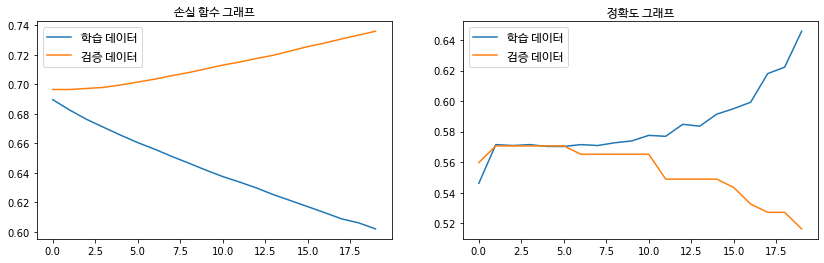

In [5]:
path = './fonts/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=12)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['학습 데이터', '검증 데이터'], loc=0, prop=fontprop)
plt.title("손실 함수 그래프", fontproperties=fontprop)

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['학습 데이터', '검증 데이터'], loc=0,  prop=fontprop)
plt.title("정확도 그래프", fontproperties=fontprop)

plt.show()